In [7]:
import pandas as pd
import numpy as np


In [8]:
item = pd.read_csv('./data/on_items.csv', encoding='cp949', )

In [9]:
item.head()

ItemLargeCode ItemLargeName ItemMiddleCode Unnamed: 3 ItemSmallCode  \
0            L1          Í∞ÄÍ≥µÏãùÌíà            M17         ÏàòÏÇ∞         S0380   
1            L1          Í∞ÄÍ≥µÏãùÌíà            M17         ÏàòÏÇ∞         S0380   
2            L1          Í∞ÄÍ≥µÏãùÌíà            M17         ÏàòÏÇ∞         S0100   
3            L1          Í∞ÄÍ≥µÏãùÌíà            M17         ÏàòÏÇ∞         S0030   
4            L1          Í∞ÄÍ≥µÏãùÌíà            M17         ÏàòÏÇ∞         S0100   

  ItemSmallName           ItemCode                           ItemName  \
0            ÏÉùÏÑ†  L1-M17-S0380-1123      Ìé≠Í∑Ñ ÍΩÅÏπòÌÜµÏ°∞Î¶º 400g x 12Ï∫î / ÍΩÅÏπòÏ∫î ÌÜµÏ°∞Î¶º   
1            ÏÉùÏÑ†  L1-M17-S0380-1009         [ÎèôÏõê] Í±¥Í∞ïÌïú 6Ìò∏ ÏÑ†Î¨ºÏÑ∏Ìä∏ /Ï∞∏Ïπò ÌÜµÏ°∞Î¶º ÌñÑ   
2             ÍπÄ  L1-M17-S0100-1097            ÎèôÏõê ÏñëÎ∞ò Íµ¨Ïö¥ÍπÄÎ∞•ÍπÄ Ï†ÑÏû•ÍπÄ 10Îß§*30Î¥â   
3           Í≥†Îì±Ïñ¥  L1-M17-S0030-1057  ÏïàÎèôÍ∞ÑÍ≥†Îì±Ïñ¥ ÏàúÏÇ¥/Î∞òÎßàÎ¶¨/HACCP/180gx10Ìå©/Í∞úÎ≥ÑÌè¨Ïû•   
4             ÍπÄ  L1-M17-S0100-1125          ÏÉàÏö∞Ìëú ÏôÑÎèÑ Ïò§Î¶¨ÏßÄÎÑê Ï†ÑÏû•ÍπÄ 25g x 40Î¥â   

   PriceYear  PriceMin  PriceMax Ïù¥ÏÉÅÏπò?  Unnamed: 12   0  59  
0       2024   38590.0     41390  NaN          NaN NaN NaN  
1       2024   38540.0     41340  NaN          NaN NaN NaN  
2       2024   38520.0     41320  NaN          NaN NaN NaN  
3       2024   38500.0     41300  NaN          NaN NaN NaN  
4       2024   38500.0     41300  NaN          NaN NaN NaN

In [ ]:
item

In [6]:
item['ItemMiddleName'].value_counts()

KeyError: 'ItemMiddleName'

In [ ]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054 entries, 0 to 10053
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ItemLargeCode   10054 non-null  object
 1   ItemLargeName   10054 non-null  object
 2   ItemMiddleCode  10054 non-null  object
 3   ItemMiddleName  10054 non-null  object
 4   ItemSmallCode   10054 non-null  object
 5   ItemSmallName   10054 non-null  object
 6   ItemCode        10054 non-null  object
 7   ItemName        10054 non-null  object
 8   PriceYear       10054 non-null  int64 
 9   PriceMin        10054 non-null  int64 
 10  PriceMax        10054 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 864.1+ KB


In [117]:
df_order = pd.read_csv('./data/on_orders_.csv', encoding = 'cp949')

In [121]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855365 entries, 0 to 855364
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idUser      855365 non-null  object
 1   idOrder     855365 non-null  object
 2   OrderDT     855365 non-null  object
 3   ItemCode    855365 non-null  object
 4   Price       855365 non-null  int64 
 5   DeliveryDT  855365 non-null  object
dtypes: int64(1), object(5)
memory usage: 39.2+ MB


In [124]:
# ÎÇ†Ïßú ÌòïÏãù Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ï
df_order['OrderDT'] = pd.to_datetime(df_order['OrderDT'], format="%d%b%Y:%H:%M:%S")


In [125]:
df_order['OrderDT'] = pd.to_datetime(df_order['OrderDT'])
df_order['OrderMonth'] = df_order['OrderDT'].dt.to_period('M')  # Ïõî Îã®ÏúÑ


In [126]:
# Ï£ºÎ¨∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú 'OrderDT'ÏôÄ 'ItemCode' Ìè¨Ìï®Îêú ÏÉÅÌÉúÎùºÍ≥† Í∞ÄÏ†ï
df_order['OrderMonth'] = df_order['OrderDT'].dt.to_period('M')

# ÏõîÎ≥Ñ Í≥†Ïú† ÏÉÅÌíà Ïàò
monthly_item_count = df_order.groupby('OrderMonth')['ItemCode'].nunique().reset_index()
monthly_item_count.columns = ['Month', 'UniqueSoldItems']
monthly_item_count['Month'] = monthly_item_count['Month'].dt.to_timestamp()


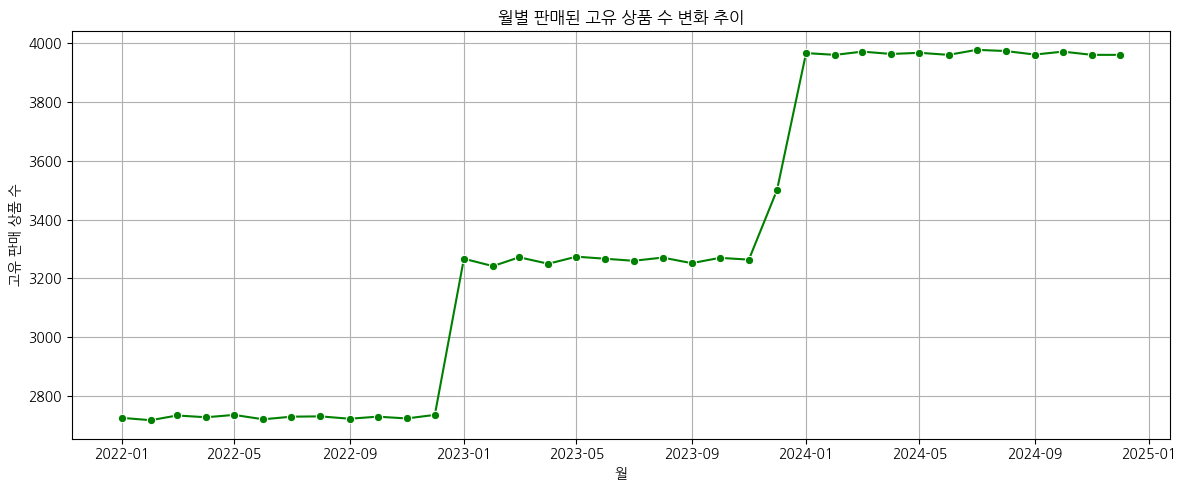

In [128]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month', y='UniqueSoldItems', data=monthly_item_count, marker='o', color='green')

plt.title('ÏõîÎ≥Ñ ÌåêÎß§Îêú Í≥†Ïú† ÏÉÅÌíà Ïàò Î≥ÄÌôî Ï∂îÏù¥')
plt.xlabel('Ïõî')
plt.ylabel('Í≥†Ïú† ÌåêÎß§ ÏÉÅÌíà Ïàò')
plt.grid(True)
plt.tight_layout()
plt.show()


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í∑∏ÎûòÌîÑ Ïä§ÌÉÄÏùº ÏÑ§Ï†ï (Í∞ÄÎ°úÌè≠ Ï§ÑÏù¥Í∏∞)
plt.figure(figsize=(8, 4))  # ‚¨ÖÔ∏è Í∞ÄÎ°úÌè≠ Ï§ÑÏûÑ

sns.lineplot(x='Month', y='UniqueSoldItems', data=monthly_item_count, marker='o', color='green')

plt.title('ÏõîÎ≥Ñ ÌåêÎß§Îêú Í≥†Ïú† ÏÉÅÌíà Ïàò Ï∂îÏù¥', fontsize=13)
plt.xlabel('Ïõî', fontsize=11)
plt.ylabel('ÌåêÎß§Îêú Í≥†Ïú† ÏÉÅÌíà Ïàò', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=9)  # ‚¨ÖÔ∏è Í∏ÄÏûêÍ∞Ä Í≤πÏπòÏßÄ ÏïäÍ≤å ÏÇ¥Ïßù Í∏∞Ïö∏Ïù¥Í∏∞
plt.yticks(fontsize=9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [1]:
monthly_item_count

NameError: name 'monthly_item_count' is not defined

## Î∞∞ÏÜ°ÏßÄÏó∞ÏòàÏ∏° Î™®Îç∏ÎßÅ

In [45]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# ÌååÏùº Í≤ΩÎ°ú ÏßÄÏ†ï
file_path = './data/df_clean (1).csv'

# ÌååÏùº ÏùΩÍ∏∞ (ÎÇ†ÏßúÌòï Ïª¨Îüº ÏûêÎèô ÌååÏã± ÏãúÎèÑ)
df = pd.read_csv(file_path, parse_dates=['OrderDT', 'DeliveryDT'])

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ Î∞è ÏÉòÌîå ÌôïÏù∏
print(df.shape)
print(df.head(3))


(856727, 32)
   idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
1  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   
2  U10001     Ïó¨ÏÑ±   26      20ÎåÄ            2        Y  U10001-O2022-1002   

              OrderDT  OrderMonth  OrderDay  ...          DeliveryDT  \
0 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
1 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   
2 2022-01-06 17:08:00           1         6  ... 2022-01-07 06:24:00   

   Deli_Year  Deli_Month Deli_Day Deli_Hour Deli_Minute Deli_Second  \
0       2022           1        7         6          24           0   
1       2022           1        7         6          24           0   
2       2022           1        7         6          24           0   

     Deli_Duration  Deli_Hours  IsMorningDelivery  
0  0 days 13:16:00   13.266667            

In [46]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   idUser             856727 non-null  object        
 1   Gender             856727 non-null  object        
 2   Age                856727 non-null  int64         
 3   AgeGroup           856727 non-null  object        
 4   FamilyCount        856727 non-null  int64         
 5   MemberYN           856727 non-null  object        
 6   idOrder            856727 non-null  object        
 7   OrderDT            856727 non-null  datetime64[ns]
 8   OrderMonth         856727 non-null  int64         
 9   OrderDay           856727 non-null  int64         
 10  OrderHour          856727 non-null  int64         
 11  OrderMinute        856727 non-null  int64         
 12  OrderSecond        856727 non-null  int64         
 13  ItemCode           856727 non-null  object  

In [48]:
df.drop(['IsMorningDelivery', 'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours'], axis=1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856727 entries, 0 to 856726
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idUser          856727 non-null  object        
 1   Gender          856727 non-null  object        
 2   Age             856727 non-null  int64         
 3   AgeGroup        856727 non-null  object        
 4   FamilyCount     856727 non-null  int64         
 5   MemberYN        856727 non-null  object        
 6   idOrder         856727 non-null  object        
 7   OrderDT         856727 non-null  datetime64[ns]
 8   ItemCode        856727 non-null  object        
 9   ItemLargeName   856727 non-null  object        
 10  ItemMiddleName  856727 non-null  object        
 11  ItemSmallName   856727 non-null  object        
 12  ItemName        856727 non-null  object        
 13  Price           856727 non-null  int64         
 14  PriceYear       856727 non-null  int

In [50]:
# 1. Î∞∞ÏÜ° ÏßÄÏó∞ Ïó¨Î∂Ä ÌåêÎã® Ìï®Ïàò
from datetime import timedelta

def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # Ïõî=0, ..., Ïùº=6

    if order_weekday == 4 and order_hour >= 21:  # Í∏àÏöîÏùº 21Ïãú Ïù¥ÌõÑ
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=3)
    elif order_weekday == 6 and order_hour >= 21:  # ÏùºÏöîÏùº 21Ïãú Ïù¥ÌõÑ
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        if order_weekday == 5:  # ÌÜ†ÏöîÏùº
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        else:  # ÏùºÏöîÏùº 21Ïãú Ïù¥Ï†Ñ
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1

# 2. ÎÉâÏû•/ÎÉâÎèô/ÏÉÅÏò® ÌååÏÉù Î≥ÄÏàòÏö© Ï§ëÎ∂ÑÎ•ò Îß§Ìïë
def map_storage_type(middle_name):
    ÎÉâÎèô = ['ÎÉâÎèô', 'ÏàòÏÇ∞']
    ÎÉâÏû• = ['Ïã†ÏÑ†', 'Ï∂ïÏÇ∞', 'Í≥ºÏùº', 'Ï±ÑÏÜå']
    ÏÉÅÏò® = ['Í≥°Î¨º', 'Í≥ºÏûê', 'ÏùåÎ£å', 'ÌÉÑÏÇ∞', 'ÏÉùÏàò', 'Ïª§Ìîº', 'Ï¶âÏÑù', 'ÏñëÎÖê']
    
    if pd.isnull(middle_name): return 'Í∏∞ÌÉÄ'
    for ÌÇ§, Í∞í in {'ÎÉâÎèô': ÎÉâÎèô, 'ÎÉâÏû•': ÎÉâÏû•, 'ÏÉÅÏò®': ÏÉÅÏò®}.items():
        if any(Ïπ¥ÌÖåÍ≥†Î¶¨ in middle_name for Ïπ¥ÌÖåÍ≥†Î¶¨ in Í∞í):
            return ÌÇ§
    return 'Í∏∞ÌÉÄ'

# 3. ÌååÏÉù ÌîºÏ≤ò ÏÉùÏÑ±
df['OrderHour'] = df['OrderDT'].dt.hour
df['OrderWeekday'] = df['OrderDT'].dt.weekday
df['DeliveryHour'] = df['DeliveryDT'].dt.hour
df['DeliveryWeekday'] = df['DeliveryDT'].dt.weekday
df['OrderToDeliveryMinutes'] = (df['DeliveryDT'] - df['OrderDT']).dt.total_seconds() / 60

df['IsWeekendOrder'] = df['OrderWeekday'].isin([5, 6]).astype(int)
df['PeakHour'] = df['OrderHour'].between(18, 21).astype(int)
df['StorageType'] = df['ItemMiddleName'].apply(map_storage_type)

# 4. ÎùºÎ≤® ÏÉùÏÑ±
df['LateYN'] = df.apply(lambda row: check_delivery(row['OrderDT'], row['DeliveryDT']), axis=1)

# 5. Ï£ºÎ¨∏Îüâ Íµ¨Í∞Ñ (Ï†ïÍ∑úÌôî ÎòêÎäî quantile Î∞©Ïãù Í∞ÄÎä•)
order_volume_q = df.groupby(df['OrderDT'].dt.date)['idOrder'].nunique()
order_volume_q = pd.qcut(order_volume_q, q=3, labels=['Low', 'Mid', 'High']).to_dict()
df['OrderDate'] = df['OrderDT'].dt.date
df['OrderVolumeLevel'] = df['OrderDate'].map(order_volume_q)

# Í≤∞Í≥º ÌôïÏù∏
print(df[['OrderDT', 'DeliveryDT', 'LateYN', 'StorageType', 'OrderVolumeLevel']].head())


              OrderDT          DeliveryDT  LateYN StorageType OrderVolumeLevel
0 2022-01-06 17:08:00 2022-01-07 06:24:00       0          ÎÉâÎèô              Mid
1 2022-01-06 17:08:00 2022-01-07 06:24:00       0          ÏÉÅÏò®              Mid
2 2022-01-06 17:08:00 2022-01-07 06:24:00       0          ÎÉâÎèô              Mid
3 2022-01-06 17:08:00 2022-01-07 06:24:00       0          ÎÉâÏû•              Mid
4 2022-01-13 16:50:00 2022-01-14 06:28:00       0          ÎÉâÏû•             High


In [51]:
df.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'ItemCode', 'ItemLargeName', 'ItemMiddleName',
       'ItemSmallName', 'ItemName', 'Price', 'PriceYear', 'PriceMin',
       'PriceMax', 'DeliveryDT', 'OrderHour', 'OrderWeekday', 'DeliveryHour',
       'DeliveryWeekday', 'OrderToDeliveryMinutes', 'IsWeekendOrder',
       'PeakHour', 'StorageType', 'LateYN', 'OrderDate', 'OrderVolumeLevel'],
      dtype='object')

In [53]:
# Ï£ºÎ¨∏ Îã®ÏúÑ ÏöîÏïΩ Ìï®Ïàò
def summarize_order_level(df):
    order_df = df.groupby('idOrder').agg({
        'OrderDT': 'first',
        'DeliveryDT': 'first',
        'Price': 'mean',
        'OrderHour': 'first',
        'OrderWeekday': 'first',
        'IsWeekendOrder': 'first',
        'PeakHour': 'first',
        'StorageType': lambda x: x.mode()[0] if not x.mode().empty else 'Í∏∞ÌÉÄ',
        'OrderVolumeLevel': 'first',
        'LateYN': 'max'  # ÌïòÎÇòÎùºÎèÑ ÏßÄÏó∞Ïù¥Î©¥ Ï†ÑÏ≤¥ ÏßÄÏó∞
    }).reset_index()

    return order_df

# 1. Ï£ºÎ¨∏ Îã®ÏúÑ ÏöîÏïΩ
df_order = summarize_order_level(df)

# 2. Ïù∏ÏΩîÎî©: StorageType ‚Üí One-hot, OrderVolumeLevel ‚Üí Ordinal
df_order = pd.get_dummies(df_order, columns=['StorageType'], drop_first=True)

volume_map = {'Low': 0, 'Mid': 1, 'High': 2}
df_order['OrderVolumeLevel'] = df_order['OrderVolumeLevel'].map(volume_map)

# 3. ÌîºÏ≤ò / ÌÉÄÍπÉ Î∂ÑÎ¶¨
X = df_order.drop(columns=['idOrder', 'OrderDT', 'DeliveryDT', 'LateYN'])  # idÏôÄ ÏãúÍ∞ÑÏùÄ Ï†úÏô∏
y = df_order['LateYN']

# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("‚úÖ Ï£ºÎ¨∏ Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨ ÏôÑÎ£å!")
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

‚úÖ Ï£ºÎ¨∏ Îã®ÏúÑÎ°ú Î∂ÑÎ¶¨ ÏôÑÎ£å!
Train: (120001, 8) Val: (25715, 8) Test: (25715, 8)


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120001 entries, 81229 to 134857
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Price             120001 non-null  float64
 1   OrderHour         120001 non-null  int64  
 2   OrderWeekday      120001 non-null  int64  
 3   IsWeekendOrder    120001 non-null  int64  
 4   PeakHour          120001 non-null  int64  
 5   OrderVolumeLevel  120001 non-null  int64  
 6   StorageType_ÎÉâÏû•    120001 non-null  uint8  
 7   StorageType_ÏÉÅÏò®    120001 non-null  uint8  
dtypes: float64(1), int64(5), uint8(2)
memory usage: 6.6 MB


In [57]:
# drop_cols = [
#     'idUser', 'Age', 'idOrder', 'OrderDT', 'ItemCode', 'ItemLargeName',
#     'ItemMiddleName', 'ItemSmallName', 'ItemName', 'PriceYear', 'FamilyCount', 'Gender', 'MemberYN',
#     'PriceMin', 'PriceMax', 'DeliveryDT', 'DeliveryHour', 'DeliveryWeekday',
#     'OrderToDeliveryMinutes', 'OrderDate'
# ]

# df_model = df.drop(columns=drop_cols)




In [58]:
# df_model.info()

### Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

# Î≤†Ïù¥Ïä§Î™®Îç∏_ÎûúÎç§Ìè¨Î†àÏä§Ìä∏

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Î™®Îç∏ ÏÑ†Ïñ∏ Î∞è ÌïôÏäµ
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 2. Í≤ÄÏ¶ùÏÖã ÏòàÏ∏°
y_pred = rf_clf.predict(X_val)
y_proba = rf_clf.predict_proba(X_val)[:, 1]  # ROC-AUCÏö© ÌôïÎ•†

# 3. ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
print("üìä Classification Report (Validation Set)")
print(classification_report(y_val, y_pred))

print("üìâ Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"üéØ ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


üìä Classification Report (Validation Set)
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     24714
           1       0.04      0.03      0.03      1001

    accuracy                           0.93     25715
   macro avg       0.50      0.50      0.50     25715
weighted avg       0.93      0.93      0.93     25715

üìâ Confusion Matrix
[[24002   712]
 [  973    28]]
üéØ ROC-AUC: 0.5111


## Ïò§Î≤ÑÏÉòÌîåÎßÅ

In [62]:
from imblearn.over_sampling import SMOTE

# Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("üîÑ After SMOTE oversampling:")
print(pd.Series(y_train_smote).value_counts())


üîÑ After SMOTE oversampling:
0    115331
1    115331
Name: LateYN, dtype: int64


In [63]:
from sklearn.ensemble import RandomForestClassifier

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf_smote.predict(X_val)
y_proba = rf_smote.predict_proba(X_val)[:, 1]

print("üìä Classification Report (Validation Set - SMOTE)")
print(classification_report(y_val, y_pred))

print("üìâ Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"üéØ ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


üìä Classification Report (Validation Set - SMOTE)
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     24714
           1       0.04      0.15      0.06      1001

    accuracy                           0.82     25715
   macro avg       0.50      0.50      0.48     25715
weighted avg       0.93      0.82      0.87     25715

üìâ Confusion Matrix
[[20813  3901]
 [  846   155]]
üéØ ROC-AUC: 0.5085


## LightGBM

In [65]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [66]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LightGBMÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
lgbm_clf = lgb.LGBMClassifier(random_state=42)

# ÌïôÏäµ (SMOTE Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
lgbm_clf.fit(X_train_smote, y_train_smote)

# ÏòàÏ∏°
y_pred = lgbm_clf.predict(X_val)
y_proba = lgbm_clf.predict_proba(X_val)[:, 1]

# ÌèâÍ∞Ä
print("üìä Classification Report (LightGBM)")
print(classification_report(y_val, y_pred))
print("üìâ Confusion Matrix")
print(confusion_matrix(y_val, y_pred))
print(f"üéØ ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


üìä Classification Report (LightGBM)
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     24714
           1       0.04      0.19      0.07      1001

    accuracy                           0.79     25715
   macro avg       0.50      0.50      0.47     25715
weighted avg       0.93      0.79      0.85     25715

üìâ Confusion Matrix
[[20062  4652]
 [  806   195]]
üéØ ROC-AUC: 0.4943


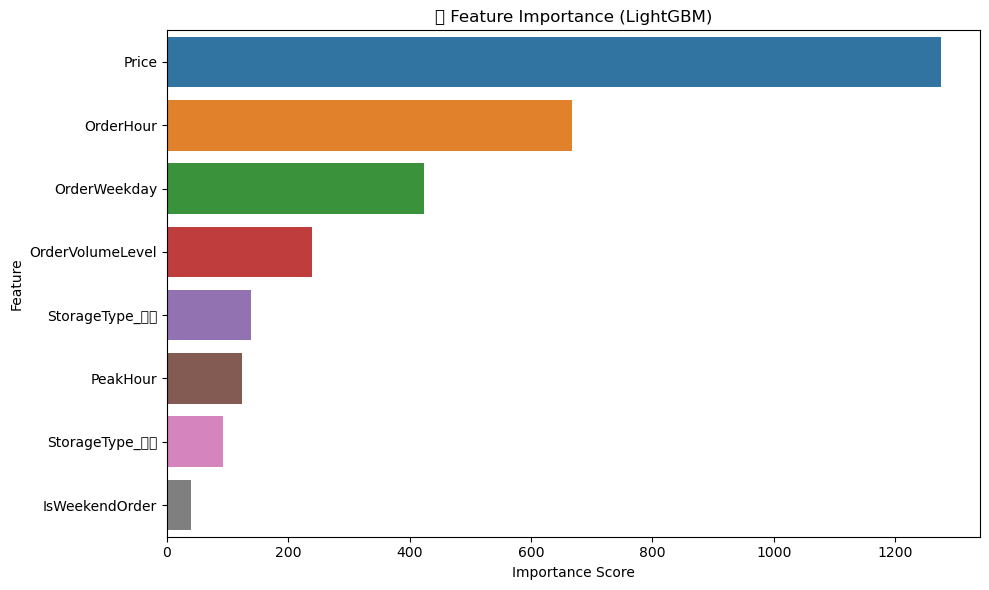

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(lgbm_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp[:15], y=feature_imp[:15].index)
plt.title('üí° Feature Importance (LightGBM)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## XGBoost

In [68]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [69]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# DMatrixÎ°ú Î≥ÄÌôò (optional but Í∂åÏû•)
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
dval = xgb.DMatrix(X_val)

# Î™®Îç∏ ÌååÎùºÎØ∏ÌÑ∞ Í∏∞Î≥∏Í∞í
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42,
    'scale_pos_weight': 24  # ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï Î≥¥Ï†ïÏö© (Ï†ïÏãú:ÏßÄÏó∞ ÎπÑÏú®)
}

# Î™®Îç∏ ÌïôÏäµ
bst = xgb.train(params, dtrain, num_boost_round=100)

# ÏòàÏ∏°
y_proba = bst.predict(dval)
y_pred = (y_proba >= 0.5).astype(int)


In [70]:
print("üìä Classification Report (XGBoost)")
print(classification_report(y_val, y_pred))

print("üìâ Confusion Matrix")
print(confusion_matrix(y_val, y_pred))

print(f"üéØ ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


üìä Classification Report (XGBoost)
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.77      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.50      0.22     25715
weighted avg       0.92      0.25      0.35     25715

üìâ Confusion Matrix
[[ 5587 19127]
 [  233   768]]
üéØ ROC-AUC: 0.4926


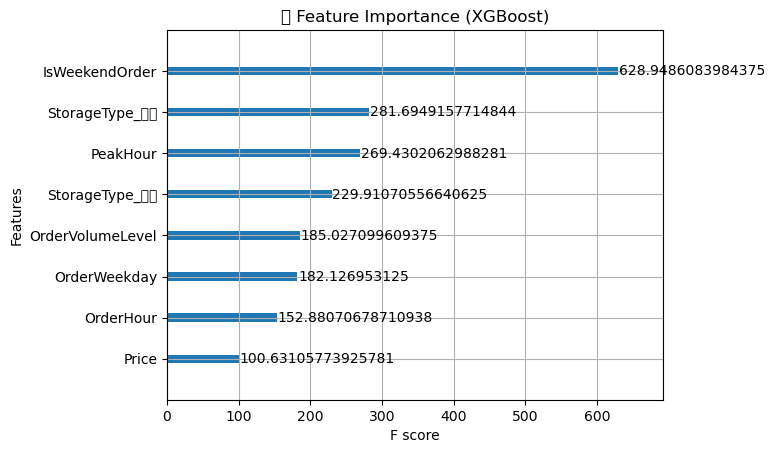

In [71]:
xgb.plot_importance(bst, max_num_features=15, importance_type='gain')
plt.title("üìå Feature Importance (XGBoost)")
plt.show()


## LightGBM ÌäúÎãù

In [72]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# LightGBM Î™®Îç∏
lgbm = lgb.LGBMClassifier(random_state=42)

# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
param_dist = {
    'num_leaves': [16, 32, 64, 128],
    'max_depth': [3, 5, 7, 10],
    'min_child_samples': [10, 20, 30, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [10, 15, 20, 25]
}

# ÌäúÎãù
rsearch = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,  # Ïã§Ìñâ ÌöüÏàò (ÎäòÎ¶¥ÏàòÎ°ù Ï†ïÌôï, Ïò§Îûò Í±∏Î¶º)
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# SMOTE Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä ÌïôÏäµ
rsearch.fit(X_train_smote, y_train_smote)

# Í≤∞Í≥º
print("‚úÖ Best Params:", rsearch.best_params_)
print("üéØ Best Score (F1):", rsearch.best_score_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
‚úÖ Best Params: {'scale_pos_weight': 10, 'num_leaves': 128, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
üéØ Best Score (F1): 0.7160900773112769


In [73]:
best_lgbm = rsearch.best_estimator_

# ÏòàÏ∏°
y_pred = best_lgbm.predict(X_val)
y_proba = best_lgbm.predict_proba(X_val)[:, 1]

# ÌèâÍ∞Ä
print("üìä Classification Report (Tuned LightGBM)")
print(classification_report(y_val, y_pred))
print("üìâ Confusion Matrix")
print(confusion_matrix(y_val, y_pred))
print(f"üéØ ROC-AUC: {roc_auc_score(y_val, y_proba):.4f}")


üìä Classification Report (Tuned LightGBM)
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.75      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.49      0.22     25715
weighted avg       0.92      0.25      0.36     25715

üìâ Confusion Matrix
[[ 5727 18987]
 [  246   755]]
üéØ ROC-AUC: 0.4938


ÏßÄÏó∞ÏòàÏ∏° ÏÑ±Îä•ÏùÄ Ìñ•ÏÉÅ, Ï†ïÏãúÎ∞∞ÏÜ°ÏùÑ ÏûòÎ™ª ÏòàÏ∏°Ìï®

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# ÏòàÏ∏° ÌôïÎ•† Í∏∞Î∞ò Threshold Ï°∞Ï†ï
thresholds = [0.3, 0.5, 0.6, 0.7, 0.8]

for t in thresholds:
    print(f"\nüéØ Threshold = {t}")
    y_pred_thresh = (y_proba >= t).astype(int)
    print(classification_report(y_val, y_pred_thresh, zero_division=0))
    print(confusion_matrix(y_val, y_pred_thresh))



üéØ Threshold = 0.3
              precision    recall  f1-score   support

           0       0.95      0.10      0.18     24714
           1       0.04      0.88      0.07      1001

    accuracy                           0.13     25715
   macro avg       0.50      0.49      0.13     25715
weighted avg       0.92      0.13      0.17     25715

[[ 2435 22279]
 [  117   884]]

üéØ Threshold = 0.5
              precision    recall  f1-score   support

           0       0.96      0.23      0.37     24714
           1       0.04      0.75      0.07      1001

    accuracy                           0.25     25715
   macro avg       0.50      0.49      0.22     25715
weighted avg       0.92      0.25      0.36     25715

[[ 5727 18987]
 [  246   755]]

üéØ Threshold = 0.6
              precision    recall  f1-score   support

           0       0.96      0.32      0.48     24714
           1       0.04      0.68      0.07      1001

    accuracy                           0.33     25715


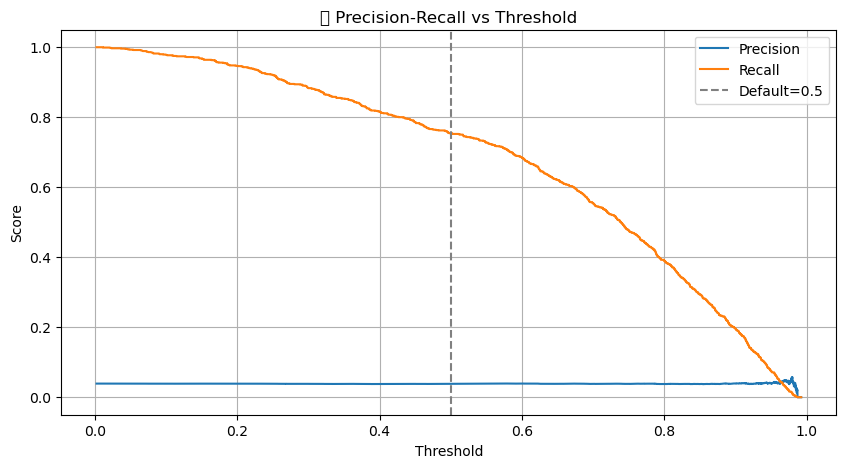

In [76]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, threshold_vals = precision_recall_curve(y_val, y_proba)

plt.figure(figsize=(10,5))
plt.plot(threshold_vals, precision[:-1], label='Precision')
plt.plot(threshold_vals, recall[:-1], label='Recall')
plt.axvline(0.5, color='gray', linestyle='--', label='Default=0.5')
plt.title("üìà Precision-Recall vs Threshold")
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()


Î∞∞ÏÜ° ÏßÄÏó∞ÏùÑ ÏÑ§Î™ÖÌï¥Ï§Ñ ÌîºÏ≤òÍ∞Ä Í±∞Ïùò ÏóÜÏùå
ÌòÑÏû¨ ÌîºÏ≤ò:

- ÏãúÍ∞Ñ Ï†ïÎ≥¥ (Ï£ºÎ¨∏ ÏãúÍ∞Å, ÏöîÏùº, ÌîºÌÅ¨ÏãúÍ∞Ñ)

- ÏÉÅÌíàÍµ∞ Ï†ïÎ≥¥ (ÎÉâÎèô/ÎÉâÏû•/ÏÉÅÏò®)

- Ï†ÑÏ≤¥ Ï£ºÎ¨∏ ÏàòÎüâ

Î¨ºÎ•ò ÏÉÅÌô©, ÏßÄÏó≠ Ï†ïÎ≥¥, ÎùºÏù¥Îçî Ïàò, ÎÇ†Ïî®, Í±∞Î¶¨ Ï†ïÎ≥¥ ÏóÜÏùå ‚Üí ÌïµÏã¨ Î≥ÄÏàòÎì§ Î∂ÄÏû¨

## Î∞∞ÏÜ°ÏßÄÏó∞ ÏòàÏ∏°Ïóê ÌïÑÏöîÌïú ÌïµÏã¨ Ï†ïÎ≥¥ Î∂ÄÏ°±ÏúºÎ°ú Î™®Îç∏ÎßÅ ÌïúÍ≥Ñ

In [82]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# ‚úÖ ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïö∞Î∂ÑÌà¨)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False


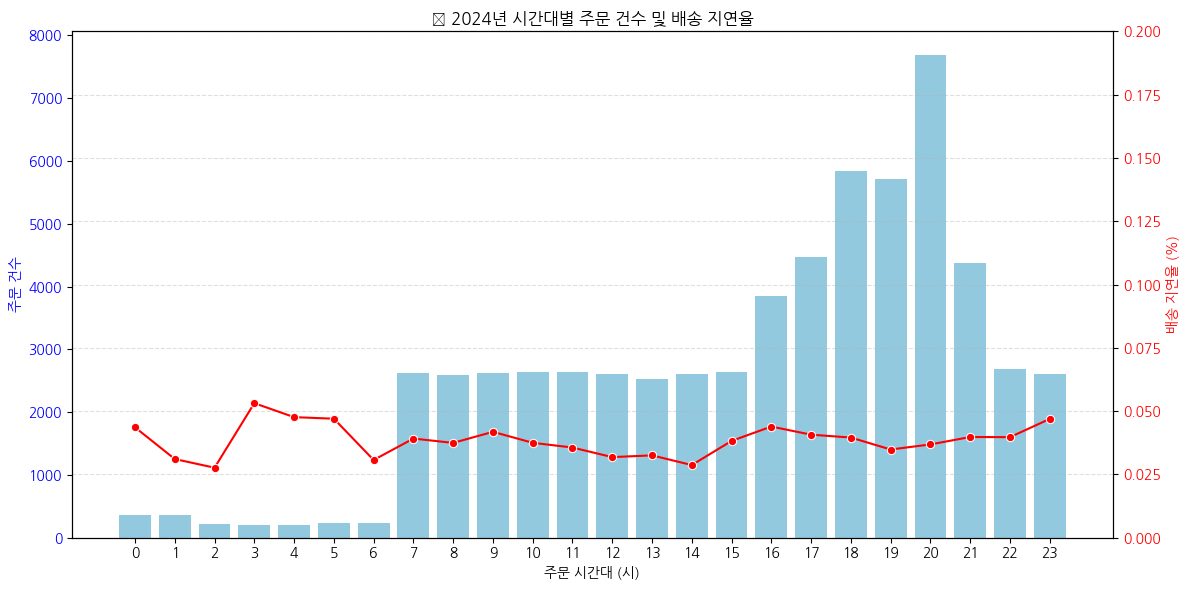

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2024ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2024 = df_order[df_order['OrderDT'].dt.year == 2024].copy()
df_2024['OrderHour'] = df_2024['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2024.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏Í±¥Ïàò: ÎßâÎåÄÍ∑∏ÎûòÌîÑ
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò', color='blue')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2024ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


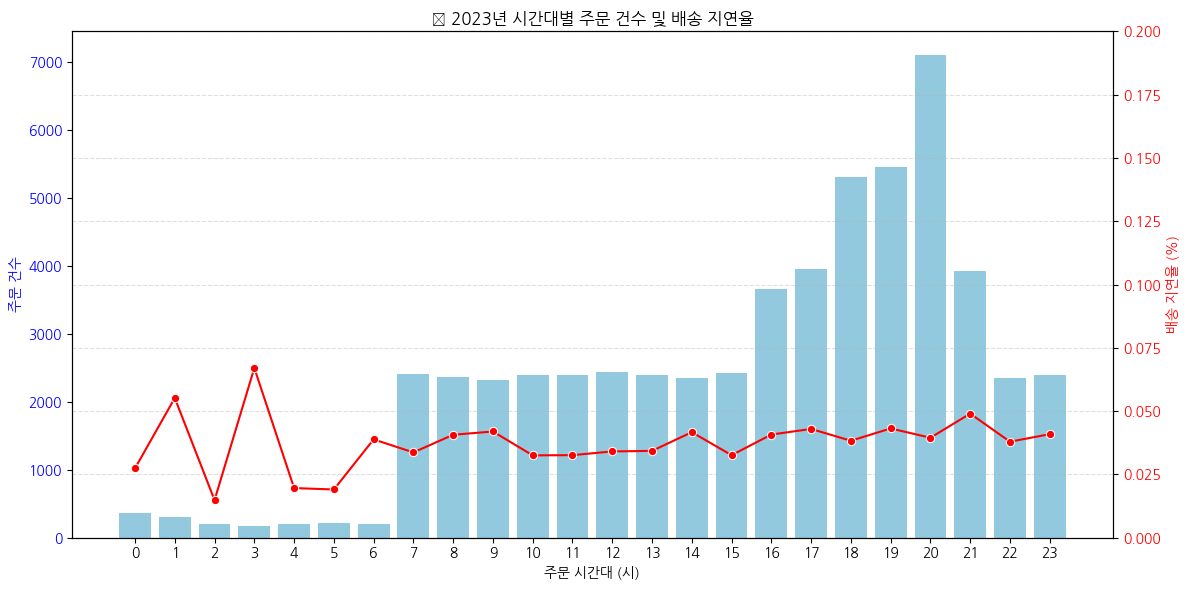

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏Í±¥Ïàò: ÎßâÎåÄÍ∑∏ÎûòÌîÑ
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò', color='blue')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2023ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏Í±¥Ïàò: ÎßâÎåÄÍ∑∏ÎûòÌîÑ
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò', color='blue')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2023ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


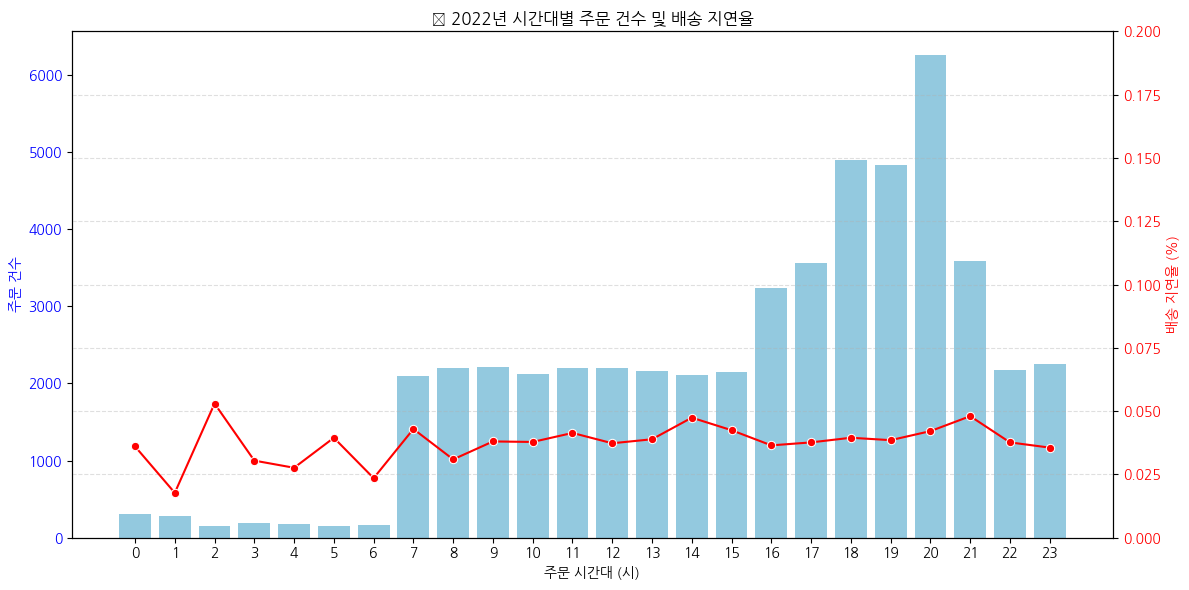

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2022ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2022 = df_order[df_order['OrderDT'].dt.year == 2022].copy()
df_2022['OrderHour'] = df_2022['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2022.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏Í±¥Ïàò: ÎßâÎåÄÍ∑∏ÎûòÌîÑ
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò', color='blue')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2023ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 2023ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_2023 = df_order[df_order['OrderDT'].dt.year == 2023].copy()
df_2023['OrderHour'] = df_2023['OrderDT'].dt.hour  # ÏãúÍ∞Ñ Ï∂îÏ∂ú

# 2. ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Ïàò / ÏßÄÏó∞Î•† ÏßëÍ≥Ñ
hourly_summary = df_2023.groupby('OrderHour').agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')  # ÌèâÍ∑†Ïù¥ Í≥ß ÏßÄÏó∞Î•†
).reset_index()

# 3. ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ï£ºÎ¨∏Í±¥Ïàò: ÎßâÎåÄÍ∑∏ÎûòÌîÑ
sns.barplot(x='OrderHour', y='OrderCount', data=hourly_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò', color='blue')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='blue')

# ÏßÄÏó∞Ïú®: ÏÑ†Í∑∏ÎûòÌîÑ (2Ï∞®Ï∂ï)
ax2 = ax1.twinx()
sns.lineplot(x='OrderHour', y='DelayRate', data=hourly_summary, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2023ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

ax2.set_ylim(0, 0.2)  # 100% Í∏∞Ï§Ä

# Ï†úÎ™© Î∞è Í∑∏Î¶¨Îìú
plt.title('üïí 2022ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [87]:
df_order['Year'] = df_order['OrderDT'].dt.year
df_order['Hour'] = df_order['OrderDT'].dt.hour

# ÏãúÍ∞ÑÎåÄ-Ïó∞ÎèÑÎ≥Ñ ÏßëÍ≥Ñ
hourly_by_year = df_order.groupby(['Year', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayRate=('LateYN', 'mean')
).reset_index()


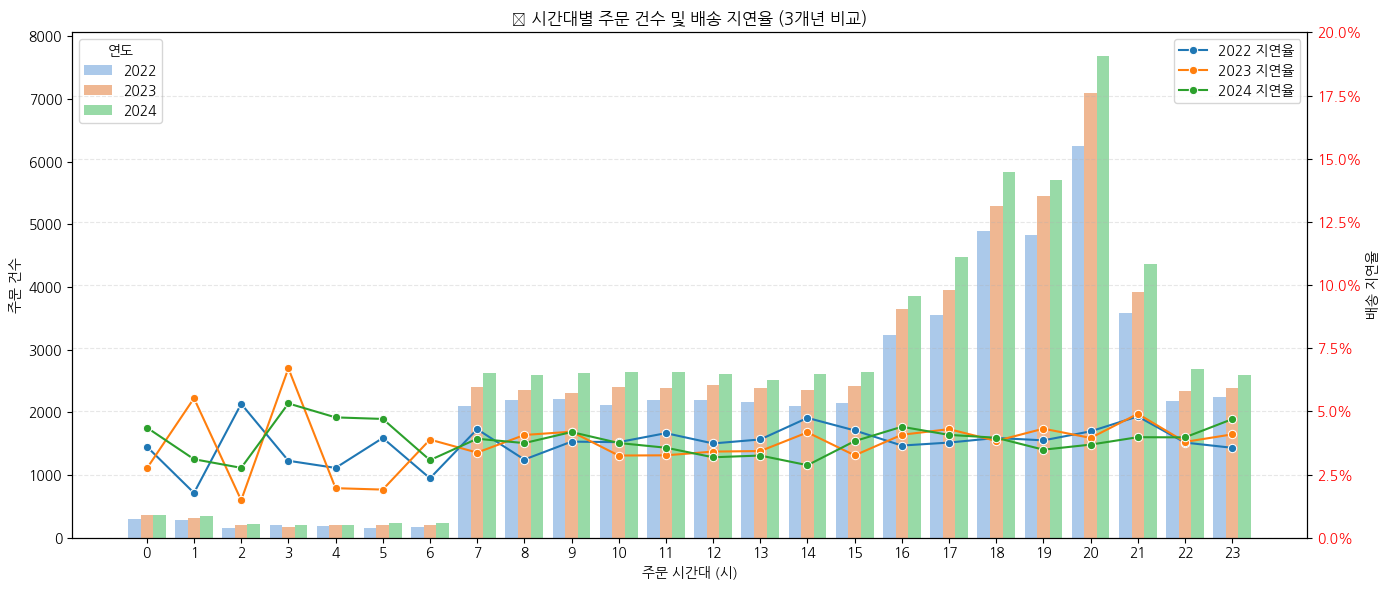

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïö∞Î∂ÑÌà¨)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ: ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï¥ù Ï£ºÎ¨∏Ïàò (stackedÍ∞Ä ÏïÑÎãå yearÎ≥Ñ ÏÉâÏÉÅ Íµ¨Î∂Ñ)
sns.barplot(
    x='Hour', y='OrderCount', hue='Year',
    data=hourly_by_year,
    ax=ax1,
    palette='pastel'
)
ax1.set_ylabel('Ï£ºÎ¨∏ Í±¥Ïàò')
ax1.set_xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(title='Ïó∞ÎèÑ', loc='upper left')

# ÏÑ† Í∑∏ÎûòÌîÑÏö© Ï∂ï
ax2 = ax1.twinx()

# ÏÑ†Í∑∏ÎûòÌîÑ: Ïó∞ÎèÑÎ≥Ñ ÏßÄÏó∞Ïú®
for year in sorted(hourly_by_year['Year'].unique()):
    temp = hourly_by_year[hourly_by_year['Year'] == year]
    sns.lineplot(
        x='Hour', y='DelayRate',
        data=temp,
        ax=ax2,
        marker='o',
        label=f"{year} ÏßÄÏó∞Ïú®"
    )

ax2.set_ylabel('Î∞∞ÏÜ° ÏßÄÏó∞Ïú®')
ax2.set_ylim(0, 0.2)
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1.0))

plt.title("üïí ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏ Í±¥Ïàò Î∞è Î∞∞ÏÜ° ÏßÄÏó∞Ïú® (3Í∞úÎÖÑ ÎπÑÍµê)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Ï£ºÎ¨∏Í±¥Ïàò + ÏßÄÏó∞Í±¥Ïàò

In [89]:
df_order['Year'] = df_order['OrderDT'].dt.year
df_order['Hour'] = df_order['OrderDT'].dt.hour

# ÏãúÍ∞ÑÎåÄ-Ïó∞ÎèÑÎ≥Ñ ÏßëÍ≥Ñ (ÏßÄÏó∞Í±¥Ïàò Ï∂îÍ∞Ä)
hourly_by_year = df_order.groupby(['Year', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayCount=('LateYN', 'sum')  # ÏßÄÏó∞Îêú Ï£ºÎ¨∏ Ïàò
).reset_index()


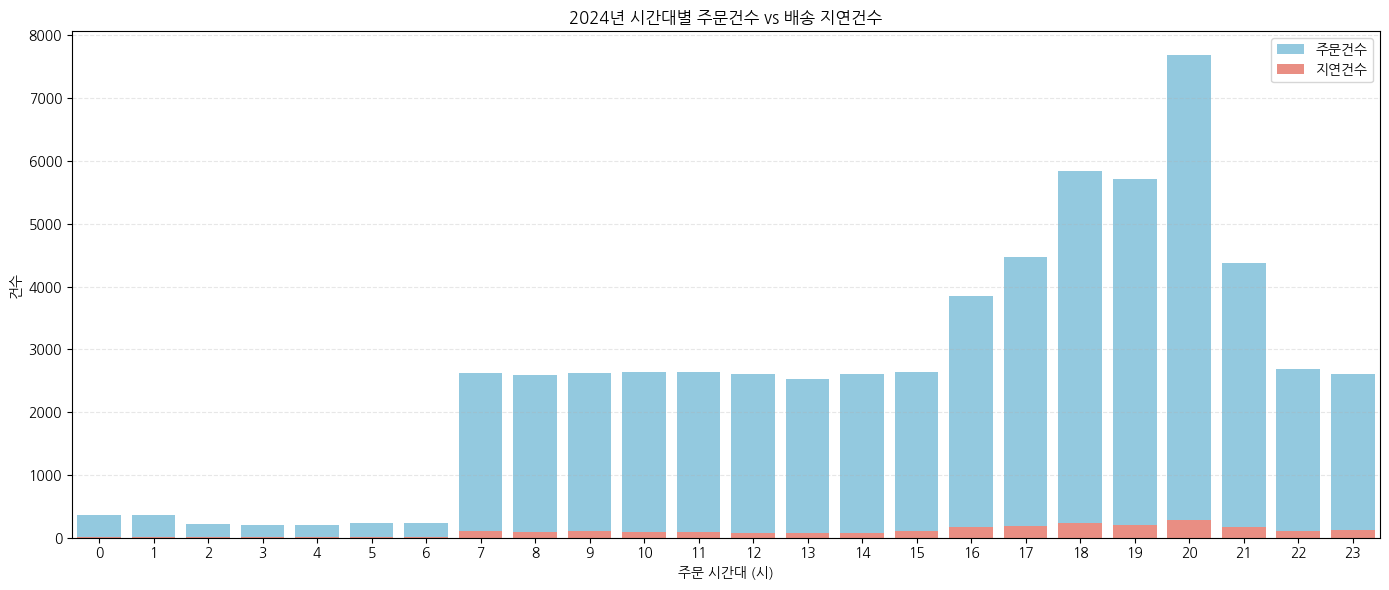

In [90]:
plt.figure(figsize=(14,6))
sns.barplot(x='Hour', y='OrderCount', data=hourly_by_year[hourly_by_year['Year']==2024], color='skyblue', label='Ï£ºÎ¨∏Í±¥Ïàò')
sns.barplot(x='Hour', y='DelayCount', data=hourly_by_year[hourly_by_year['Year']==2024], color='salmon', label='ÏßÄÏó∞Í±¥Ïàò')

plt.title("2024ÎÖÑ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò vs Î∞∞ÏÜ° ÏßÄÏó∞Í±¥Ïàò")
plt.xlabel("Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)")
plt.ylabel("Í±¥Ïàò")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### Ïò§ÌõÑ 16Ïãú~21Ïãú ‚Üí Ï£ºÎ¨∏Îüâ + ÏßÄÏó∞Í±¥Ïàò Î™®Îëê ÏßëÏ§ë
20ÏãúÏóê ÌîºÌÅ¨ (Ï£ºÎ¨∏Í±¥Ïàò Í±∞Ïùò 8,000Í±¥)

Ïù¥ ÏãúÍ∞ÑÎåÄÎäî ÏßÄÏó∞Í±¥ÏàòÎèÑ ÎààÏóê ÎùÑÍ≤å ÎßéÏùå

‚úÖ Î∞∞ÏÜ° ÏßÄÏó∞Ïóê Ïã§ÏßàÏ†ÅÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏãúÍ∞ÑÎåÄ

‚û°Ô∏è Ïö¥ÏòÅ Î¶¨ÏÜåÏä§(ÎùºÏù¥Îçî, ÏÑºÌÑ∞ Ïù∏Î†•, Ï∞®Îüâ) ÏßëÏ§ë Î∞∞Ïπò ÌïÑÏöî



In [91]:
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8')  # ÏöîÏùº Ïù¥Î¶Ñ (ÏòÅÏñ¥)
df_order['Hour'] = df_order['OrderDT'].dt.hour

# ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏßëÍ≥Ñ
hourly_by_weekday = df_order.groupby(['Weekday', 'Hour']).agg(
    OrderCount=('idOrder', 'count'),
    DelayCount=('LateYN', 'sum')
).reset_index()


In [92]:
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
hourly_by_weekday['Weekday'] = hourly_by_weekday['Weekday'].astype(cat_type)


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ÌïúÍ∏ÄÌè∞Ìä∏ (Ïö∞Î∂ÑÌà¨)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, day in enumerate(weekday_order):
    temp = hourly_by_weekday[hourly_by_weekday['Weekday'] == day]
    ax = axes[i]

    # Ï£ºÎ¨∏Í±¥Ïàò ÎßâÎåÄ
    sns.barplot(x='Hour', y='OrderCount', data=temp, ax=ax, color='skyblue', label='Ï£ºÎ¨∏Í±¥Ïàò')

    # ÏßÄÏó∞Í±¥Ïàò ÏÑ†Í∑∏ÎûòÌîÑ
    ax2 = ax.twinx()
    sns.lineplot(x='Hour', y='DelayCount', data=temp, ax=ax2, color='red', marker='o', label='ÏßÄÏó∞Í±¥Ïàò')

    ax.set_title(f"{day} ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï£ºÎ¨∏Í±¥Ïàò & ÏßÄÏó∞Í±¥Ïàò")
    ax.set_ylabel('Ï£ºÎ¨∏Í±¥Ïàò')
    ax2.set_ylabel('ÏßÄÏó∞Í±¥Ïàò')
    ax2.tick_params(axis='y', labelcolor='red')

    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# ÎßàÏßÄÎßâ Îπà subplot Ï†úÍ±∞
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [94]:
# ÏöîÏùº Ï†ïÎ†¨
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8').astype(cat_type)
df_order['Hour'] = df_order['OrderDT'].dt.hour

# ÌîºÎ≤ó ÌÖåÏù¥Î∏î (ÏßÄÏó∞Í±¥Ïàò Í∏∞Ï§Ä)
heatmap_data = df_order.pivot_table(
    index='Weekday',
    columns='Hour',
    values='LateYN',
    aggfunc='sum',  # ‚Üí ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏßÄÏó∞ Í±¥Ïàò Ï¥ùÌï©
    fill_value=0
)


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# ÌïúÍ∏Ä Ìè∞Ìä∏ (Ïö∞Î∂ÑÌà¨Ïö©)
plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(16, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='Reds',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('üìç ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∞∞ÏÜ° ÏßÄÏó∞Í±¥Ïàò ÌûàÌä∏Îßµ')
plt.xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
plt.ylabel('ÏöîÏùº')
plt.tight_layout()
plt.show()


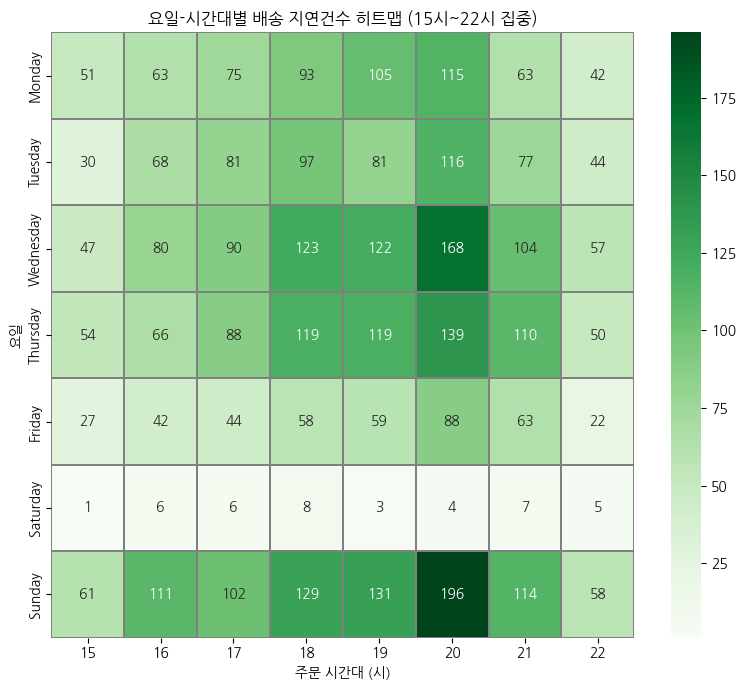

In [105]:
# ‚ñ∂Ô∏è Í∏∞Ï°¥ ÌîºÎ≤óÌÖåÏù¥Î∏îÏóêÏÑú ÏõêÌïòÎäî ÏãúÍ∞ÑÎåÄÎßå Ï∂îÏ∂ú (15Ïãú~22Ïãú)
heatmap_focus = heatmap_data.loc[:, 15:22]

# ‚ñ∂Ô∏è ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 7))
sns.heatmap(
    heatmap_focus,
    annot=True,
    fmt='.0f',
    cmap='Greens',
    linewidths=0.3,
    linecolor='gray'
)

plt.title('ÏöîÏùº-ÏãúÍ∞ÑÎåÄÎ≥Ñ Î∞∞ÏÜ° ÏßÄÏó∞Í±¥Ïàò ÌûàÌä∏Îßµ (15Ïãú~22Ïãú ÏßëÏ§ë)')
plt.xlabel('Ï£ºÎ¨∏ ÏãúÍ∞ÑÎåÄ (Ïãú)')
plt.ylabel('ÏöîÏùº')
plt.tight_layout()
plt.show()


## "ÏàòÏùºÏöîÏùº 1821Ïãú"Îäî Î∞∞ÏÜ° ÏßÄÏó∞ ÎåÄÏùë ÏµúÏö∞ÏÑ† Íµ¨Í∞Ñ
Ïù¥ ÏãúÍ∞ÑÎåÄÎßå Ïû°ÏïÑÎèÑ Ï†ÑÏ≤¥ ÏßÄÏó∞Ïùò ÏïΩ 30% Ìï¥ÏÜå Í∞ÄÎä•

In [99]:
# 1. Ï†ÑÏ≤¥ ÏßÄÏó∞ Í±¥Ïàò
total_delay = df_order['LateYN'].sum()

# 2. ÎåÄÏÉÅ ÌïÑÌÑ∞ÎßÅ: ÏàòÏöîÏùº~ÏùºÏöîÏùº + 18Ïãú~21Ïãú
target_days = ['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_order['Weekday'] = df_order['OrderDT'].dt.day_name(locale='en_US.utf8')
df_order['Hour'] = df_order['OrderDT'].dt.hour

target_delay = df_order[
    (df_order['Weekday'].isin(target_days)) &
    (df_order['Hour'].between(18, 21))
]['LateYN'].sum()

# 3. ÎπÑÏú® Í≥ÑÏÇ∞ (%)
contribution_rate = target_delay / total_delay * 100

print(f"üéØ Ïàò~ÏùºÏöîÏùº 18~21Ïãú ÏßÄÏó∞Í±¥Ïàò ÎπÑÏ§ë: {contribution_rate:.2f}%")


üéØ Ïàò~ÏùºÏöîÏùº 18~21Ïãú ÏßÄÏó∞Í±¥Ïàò ÎπÑÏ§ë: 27.94%


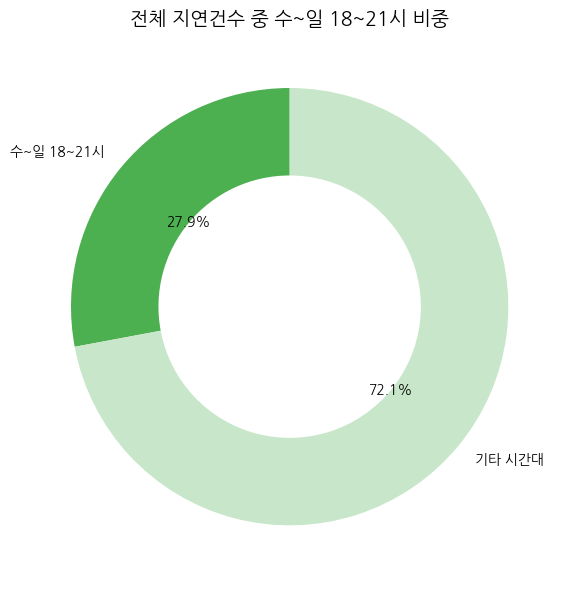

In [102]:
import matplotlib.pyplot as plt

# Í∞í Ï§ÄÎπÑ
labels = ['Ïàò~Ïùº 18~21Ïãú', 'Í∏∞ÌÉÄ ÏãúÍ∞ÑÎåÄ']
values = [target_delay, total_delay - target_delay]
colors = ['#4CAF50', '#C8E6C9']  # Ï¥àÎ°ù Í≥ÑÏó¥

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})

plt.title('Ï†ÑÏ≤¥ ÏßÄÏó∞Í±¥Ïàò Ï§ë Ïàò~Ïùº 18~21Ïãú ÎπÑÏ§ë', fontsize=14)
plt.tight_layout()
plt.show()


 ÍπîÎÅîÌïòÍ≤å ÏÇ¨Ïã§ Ï†ÑÎã¨:

 ÏàòÏùºÏöîÏùº 1821ÏãúÎäî Ï†ÑÏ≤¥ Î∞∞ÏÜ° ÏßÄÏó∞Ïùò ÏïΩ **28%**Í∞Ä ÏßëÏ§ëÎêòÎäî Íµ¨Í∞ÑÏûÖÎãàÎã§.

 ÎåÄÏïà 2: Ï†ÑÎûµ Í∞ïÏ°∞Ìòï:

Ï†ÑÏ≤¥ Î∞∞ÏÜ° ÏßÄÏó∞Ïùò 4Í±¥ Ï§ë 1Í±¥ Ïù¥ÏÉÅÏù¥ ÏàòÏùºÏöîÏùº 1821ÏãúÏóê Î∞úÏÉùÌï©ÎãàÎã§.
Ïù¥ Íµ¨Í∞ÑÏóê Ïö¥ÏòÅ Î¶¨ÏÜåÏä§Î•º ÏßëÏ§ëÌïòÎ©¥ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏßÄÏó∞ÏùÑ Ï§ÑÏùº Ïàò ÏûàÏäµÎãàÎã§.

ÎåÄÏïà 3: UX Í¥ÄÏ†ê Ìè¨Ìï®:

ÏßÄÏó∞ Î∞úÏÉù ÎπÑÏ§ëÏù¥ ÎÜíÏùÄ **ÏàòÏùºÏöîÏùº Ï†ÄÎÖÅ ÏãúÍ∞ÑÎåÄ(1821Ïãú)**ÏóêÎäî
Í≥†Í∞ù ÎåÄÏÉÅ ÏïàÎÇ¥ Î©îÏãúÏßÄ Í∞ïÌôî ÎòêÎäî Î∞∞ÏÜ° ÎßàÍ∞ê UXÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

### Í∞úÏÑ†Î∞©Ïïà?

ÎùºÏù¥Îçî Ïù∏Î†• 2Î™Ö Îçî Î∞∞Ï†ï

Ï∞®Îüâ 1ÎåÄ Ï∂îÍ∞Ä ÏûÑÎåÄ

ÎãπÏùº ÌîºÌÇπ ÏûëÏóÖ Ïù∏Ïõê Ï°∞Ï†ï

20Ïãú Ï†Ñ ÏûêÎèôÌôî ÏÑ§ÎπÑ ÏûëÏóÖ ÏÜçÎèÑ ÏóÖ

SLA Î≥ÄÍ≤Ω ‚Üí Ïú†ÏûÖ Î∂ÑÏÇ∞